In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

plt.rcParams["figure.dpi"] = 100
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.titlesize"] = 18

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Importar datos

In [134]:
data = pd.read_csv("iris.data",header=None,names=["sepal_length","sepal_width","petal_length","petal_width","species"])

Pasar de labels textuales a un código por especie

In [135]:
unique_species = np.sort(np.unique(data["species"]))
codes = {species:i for i,species in enumerate(unique_species)}
data["code"] = data["species"].apply(codes.get)

### Exploración de los datos

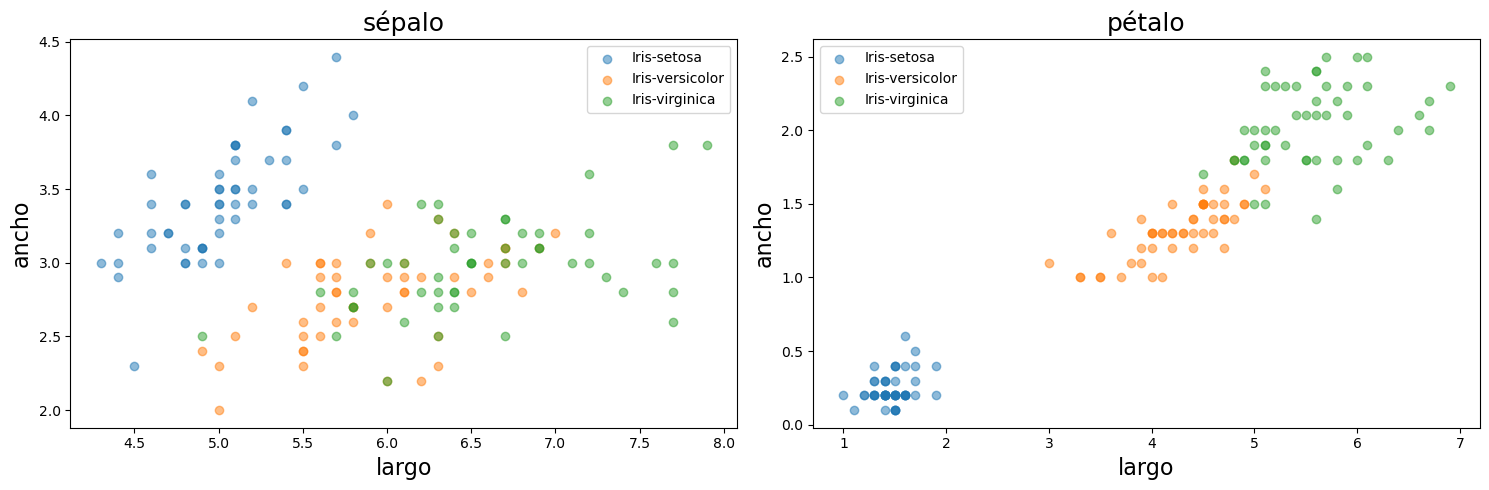

In [114]:
fig,axes = plt.subplots(ncols=2,figsize=(15,5))

axes[0].set_title("sépalo")
axes[1].set_title("pétalo")

for species,df in data.groupby("species"):
    axes[0].scatter(df.sepal_length,df.sepal_width,label=species,alpha=0.5)
    axes[1].scatter(df.petal_length,df.petal_width,label=species,alpha=0.5)

for ax in axes:
    plt.sca(ax)
    plt.xlabel("largo")
    plt.ylabel("ancho")
    plt.legend()
    
plt.tight_layout()

# 1. Clasificación binaria

Entre _I. setosa_ y _I.versicolor_, es decir, quitamos _I. virginica_

In [115]:
data1 = data[data["code"] != codes["Iris-virginica"]]

Se eligen el largo y anch ode los pétalos para diferenciar las especies

In [116]:
X = data1[["petal_length","petal_width"]].values 
y = data1["code"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [117]:
perceptron = Perceptron(tol=1e-4).fit(X_train,y_train)

El perceptron tiene un rendimiento de:

In [118]:
perceptron.score(X_test,y_test)

1.0

# 2. Perceptrones multicapa

In [119]:
X = data.drop(["species","code"],axis=1).values
y = data["code"].values

Se comparan perceptrones con topologías `(n,n)` y `(n,2n,n)`, para varios valore de `n`

In [132]:
layers = np.arange(2,9)

perf2 = np.zeros(len(layers))
perf3 = np.zeros(len(layers))

for i in tqdm(range(len(layers))):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
    
    classifier2 = MLPClassifier(hidden_layer_sizes=(layers[i],layers[i]),max_iter=int(1e4)).fit(X_train,y_train)
    perf2[i] = classifier2.score(X_test,y_test)
    classifier3 = MLPClassifier(hidden_layer_sizes=(layers[i],2*layers[i],layers[i]),max_iter=int(1e4)).fit(X_train,y_train)
    perf3[i] = classifier3.score(X_test,y_test)

100%|██████████| 7/7 [00:10<00:00,  1.47s/it]


Text(0, 0.5, 'score')

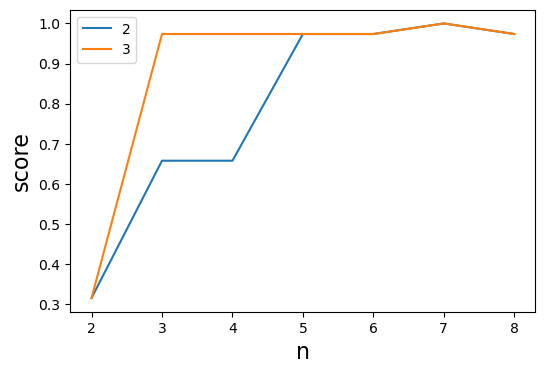

In [136]:
plt.plot(layers,perf2,label="2")
plt.plot(layers,perf3,label="3")
plt.legend()
plt.xlabel("n")
plt.ylabel("score")

Esta gráfica cambia, y depende de la inicialización aleatoria del perceptrón y de la división entre los training/testing samples. Pero por lo general, la arquitectura `(n,2n,n)` tiene mejor rendimiento que la de sólo dos capas.